In [1]:
import pandas as pd

In [15]:
# df1 = pd.read_csv('tripadvisor_emirates_reviews.csv', index_col=0)
# df2 =  pd.read_csv('tripadvisor_lufthansa_reviews.csv', index_col=0)

# frames = [df1, df2]
# df = pd.concat(frames)

# df.to_csv('tripadvisor_airline_reviews.csv', encoding='UTF-8')

In [8]:
df = pd.read_csv('../data/tripadvisor_airline_reviews.csv', index_col=0)

<class 'pandas.core.frame.DataFrame'>
Index: 1985 entries, 0 to 994
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                1985 non-null   object 
 1   title              0 non-null      float64
 2   text               1985 non-null   object 
 3   rating             1985 non-null   float64
 4   reviewer_handle    0 non-null      float64
 5   language           0 non-null      float64
 6   airline_name       1985 non-null   object 
 7   flight_date        0 non-null      float64
 8   flight_connection  0 non-null      float64
 9   flight_type        0 non-null      float64
 10  booking_class      0 non-null      float64
dtypes: float64(8), object(3)
memory usage: 186.1+ KB


<Axes: >

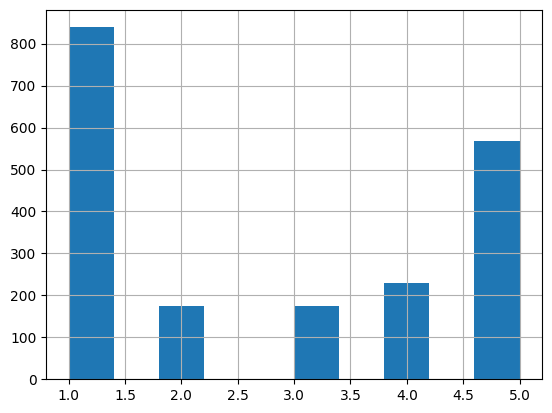

In [9]:
df.head()
df.info()
df['rating'].hist()

In [10]:
def categorize(rating):

    if rating <= 2.0:
        return 'Negative'
    elif rating >= 4.0:
        return 'Positive'
    else:
        return 'Neutral'

In [11]:
df['sentiment'] = df['rating'].apply(categorize)

In [12]:
df.head()

,_id,title,text,rating,reviewer_handle,language,airline_name,flight_date,flight_connection,flight_type,booking_class,sentiment
0,BAFHFJ4n,NaN,Ich bin sehr positiv angetan mit diese Gesells...,5.0,NaN,NaN,Emirates,NaN,NaN,NaN,NaN,Positive
1,DKCtYZuj,NaN,Flug war auf der Hinreise knapp 1 Stunde versp...,3.0,NaN,NaN,Emirates,NaN,NaN,NaN,NaN,Neutral
2,gUyMgdC3,NaN,Flug wurde von Sbg ursprünglich gebucht. Wurde...,2.0,NaN,NaN,Emirates,NaN,NaN,NaN,NaN,Negative
3,MHjJQCeQ,NaN,Wir sind um 15 Uhr 30 in den Flieger gestiegen...,2.0,NaN,NaN,Emirates,NaN,NaN,NaN,NaN,Negative
4,ppb5iYWW,NaN,"Flug war auf der Hinreise 2h verspätet, auf de...",3.0,NaN,NaN,Emirates,NaN,NaN,NaN,NaN,Neutral


<Axes: >

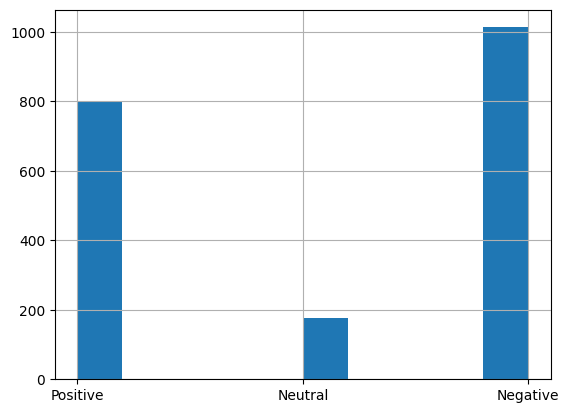

In [13]:
df['sentiment'].hist()

In [14]:
df_filtered = df[df['sentiment'].isin(['Positive','Negative'])]


In [15]:
df_filtered.head()

,_id,title,text,rating,reviewer_handle,language,airline_name,flight_date,flight_connection,flight_type,booking_class,sentiment
0,BAFHFJ4n,NaN,Ich bin sehr positiv angetan mit diese Gesells...,5.0,NaN,NaN,Emirates,NaN,NaN,NaN,NaN,Positive
2,gUyMgdC3,NaN,Flug wurde von Sbg ursprünglich gebucht. Wurde...,2.0,NaN,NaN,Emirates,NaN,NaN,NaN,NaN,Negative
3,MHjJQCeQ,NaN,Wir sind um 15 Uhr 30 in den Flieger gestiegen...,2.0,NaN,NaN,Emirates,NaN,NaN,NaN,NaN,Negative
5,HF1dz34d,NaN,Ich und mein Freund flogen Mitte April nach Du...,1.0,NaN,NaN,Emirates,NaN,NaN,NaN,NaN,Negative
6,VLoFweME,NaN,Rückreise aus Neuseeland war folgenderweise ge...,1.0,NaN,NaN,Emirates,NaN,NaN,NaN,NaN,Negative


<Axes: >

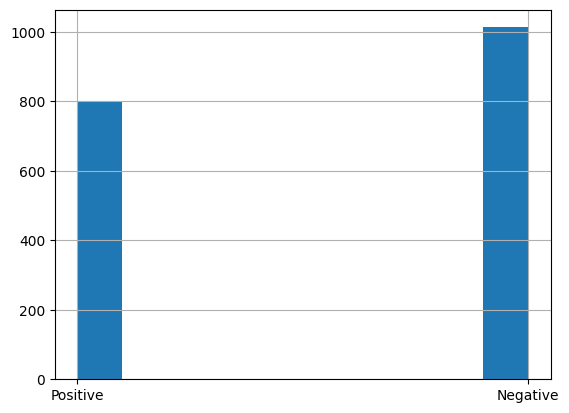

In [16]:
df_filtered['sentiment'].hist()

In [17]:
df_final = df_filtered.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(500))

<Axes: >

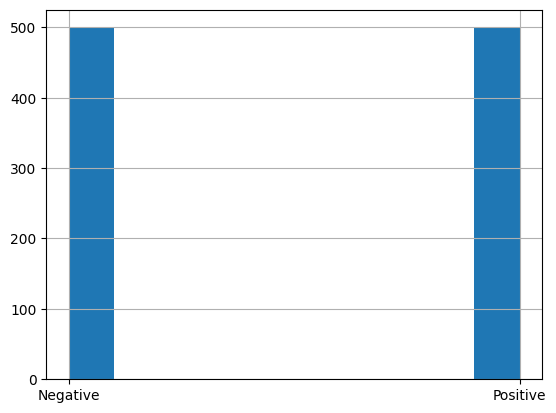

In [18]:
df_final['sentiment'].hist()

In [19]:
df_filtered.to_csv('../data/tripadvisor_airlinereviews_binary.csv', encoding='UTF-8')